In [9]:
from fastai.vision.all import *
import ipywidgets as widgets

In [2]:
path = untar_data(URLs.PETS)/'images'

In [6]:
path

Path('/home/mihlos/.fastai/data/oxford-iiit-pet/images')

In [2]:
def is_cat(x): return x[0].isupper()

In [2]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [2]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/mihlos/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.171128,0.022345,0.006089,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.053733,0.017731,0.004060,00:21


In [10]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [13]:
uploader = SimpleNamespace(data = ['images/gato.jpg'])

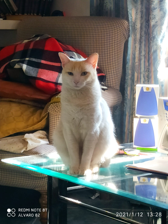

In [16]:
img = PILImage.create(uploader.data[0])
img.to_thumb(224)

In [17]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999978
